# From youtube tutorial: https://www.youtube.com/watch?v=c0k-YLQGKjY

Single variable

Predicting future values of a single variable

In [43]:
import tensorflow 
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
directory = '/Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/'
dataFiles = [f for f in listdir(directory) if isfile(join(directory, f))] 
for file in dataFiles:
    print(file)
    df = pd.read_csv(directory + file)

#for now, I will only use SF data 
location = '_SF'
df = pd.read_csv(directory + dataFiles[3])
df

SAC-NOAA-and-Megawatts.csv
SD-NOAA-and-Megawatts.csv
SD-yearAvg-NOAA-and-Megawatts.csv
SF-NOAA-and-Megawatts.csv
SAC-yearAvg-NOAA-and-Megawatts.csv
LA-yearAvg-NOAA-and-Megawatts.csv
LA-NOAA-and-Megawatts.csv
SF-yearAvg-NOAA-and-Megawatts.csv


,date,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
0,01-01T00:00:00,48.8,44.1,54.0,43.2,35.1,50.0,1020.1,1011.5,1026.9,...,47.3,6.3,25.4,196.0,1.1,5.0,14.7,4.0,14.3,283652.0
1,01-01T01:00:00,48.5,43.0,54.0,43.1,35.1,50.0,1019.9,1011.0,1026.8,...,47.0,6.2,28.5,193.0,1.2,4.0,14.6,5.0,13.1,252485.0
2,01-01T02:00:00,47.6,42.1,53.1,42.6,35.1,50.0,1020.0,1011.2,1026.8,...,46.0,6.2,26.5,184.0,0.9,4.0,14.8,6.0,12.5,245501.0
3,01-01T03:00:00,47.2,41.0,54.0,42.3,34.0,50.0,1020.0,1011.2,1026.9,...,45.5,6.2,24.9,178.0,1.1,4.0,16.3,5.0,13.5,241545.0
4,01-01T04:00:00,46.8,39.9,53.1,42.2,34.0,50.0,1019.8,1010.5,1026.6,...,45.0,5.9,27.9,175.0,0.8,4.0,15.6,7.0,11.2,241926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12-31T19:00:00,51.5,46.9,55.9,43.9,36.0,51.1,1019.5,1010.7,1026.4,...,50.3,7.7,17.8,255.0,1.9,7.0,22.4,4.0,14.0,308820.0
8756,12-31T20:00:00,51.0,46.0,55.0,43.6,36.0,51.1,1019.7,1011.2,1026.6,...,49.8,7.2,21.4,243.0,1.2,7.0,17.7,4.0,13.8,297758.0
8757,12-31T21:00:00,50.5,46.0,55.0,43.5,35.1,50.0,1019.9,1011.0,1026.8,...,49.1,7.1,18.7,218.0,1.3,7.0,18.7,4.0,16.5,287403.0
8758,12-31T22:00:00,49.8,45.0,54.0,43.4,35.1,50.0,1020.1,1011.5,1027.1,...,48.4,6.6,24.3,209.0,1.1,4.0,18.0,7.0,14.8,275322.0


In [45]:
df['date'] = pd.to_datetime(df['date'], format='%m-%dT%H:%M:%S')
df['date']= df["date"].map(lambda x: x.replace(year=2019))
df.index = df['date']
df

,date,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,...,HLY_WCHL_NORMAL_SF,HLY_WIND_AVGSPD_SF,HLY_WIND_PCTCLM_SF,HLY_WIND_VCTDIR_SF,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Megawatts_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,48.8,44.1,54.0,43.2,35.1,50.0,1020.1,1011.5,1026.9,...,47.3,6.3,25.4,196.0,1.1,5.0,14.7,4.0,14.3,283652.0
2019-01-01 01:00:00,2019-01-01 01:00:00,48.5,43.0,54.0,43.1,35.1,50.0,1019.9,1011.0,1026.8,...,47.0,6.2,28.5,193.0,1.2,4.0,14.6,5.0,13.1,252485.0
2019-01-01 02:00:00,2019-01-01 02:00:00,47.6,42.1,53.1,42.6,35.1,50.0,1020.0,1011.2,1026.8,...,46.0,6.2,26.5,184.0,0.9,4.0,14.8,6.0,12.5,245501.0
2019-01-01 03:00:00,2019-01-01 03:00:00,47.2,41.0,54.0,42.3,34.0,50.0,1020.0,1011.2,1026.9,...,45.5,6.2,24.9,178.0,1.1,4.0,16.3,5.0,13.5,241545.0
2019-01-01 04:00:00,2019-01-01 04:00:00,46.8,39.9,53.1,42.2,34.0,50.0,1019.8,1010.5,1026.6,...,45.0,5.9,27.9,175.0,0.8,4.0,15.6,7.0,11.2,241926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019-12-31 19:00:00,51.5,46.9,55.9,43.9,36.0,51.1,1019.5,1010.7,1026.4,...,50.3,7.7,17.8,255.0,1.9,7.0,22.4,4.0,14.0,308820.0
2019-12-31 20:00:00,2019-12-31 20:00:00,51.0,46.0,55.0,43.6,36.0,51.1,1019.7,1011.2,1026.6,...,49.8,7.2,21.4,243.0,1.2,7.0,17.7,4.0,13.8,297758.0
2019-12-31 21:00:00,2019-12-31 21:00:00,50.5,46.0,55.0,43.5,35.1,50.0,1019.9,1011.0,1026.8,...,49.1,7.1,18.7,218.0,1.3,7.0,18.7,4.0,16.5,287403.0


# LSTM 
- temperature at hour: 1,2,3,4,5 and predict for hour:6
- temperature at hour: 2,3,4,5,6 and predict for hour: 7
- output: y vector - [6] [7] 
- input: x matrix? - [1,2,3,4,5] [2,3,4,5,6]

1. to make it multivariate:
- temperature and clouds at hour: 1,2,3,4,5 and predict for hour:6
- temperature at hour: 2,3,4,5,6 and predict for hour: 7
- output: y vector - [6] [7] 
- input: x matrix? - [[1,cloud1],[2, cloud2],[3,cloud3],[4, cloud4],[5,cloud5] [2,3,4,5,6] etc etc

# Train and testing data

- 0.7 training
- 0.1 validation
- 0.2 testing

In [47]:
#make the X data = [1,2,3,4,5] the list of lists with 5 pieces of past data
# make the y data = output prediction
def df_to_X_y(df, window_size= 5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ [a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)
        

In [48]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((8755, 5, 1), (8755,))

In [49]:
train_percent = 0.6
validation_percent = 0.2
test_percent = 0.2

train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
test_percent_split = int(test_percent * len(X))

X_train, y_train = X[:train_percent_split], y[:train_percent_split]
X_val, y_val = X[train_percent_split:validation_percent_split], y[train_percent_split:validation_percent_split] #validation
X_test, y_test = X[validation_percent_split:], y[validation_percent_split:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5253, 5, 1), (5253,), (1751, 5, 1), (1751,), (1751, 5, 1), (1751,))

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

from sklearn.metrics import mean_squared_error as mse

In [51]:
# #model input layer is 24, 1 - shape of data
# #when i apply a new layer, I am increasing complexity of model 
# model = Sequential()
# model.add(LSTM(64, input_shape=(1,4))) #64 = # of units for each layer; 4 = # of features/columns, 1 = timestep
# model.add(Dense(8, 'relu')) #relu to learn non-linear dependencies
# model.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
# model.summary()

In [112]:
def plot_predictions1(model, X, y, start = 0, end = 100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data = {'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end], color = 'red')
    plt.plot(df['Actuals'][start:end], color = 'green')
    return df, mse(y, predictions)
    

In [113]:
temp_df = pd.DataFrame({'HLY_TEMP_NORMAL_SF': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df
#seconds starts from a neg number, can make it start from 0 by adding values

,HLY_TEMP_NORMAL_SF,Seconds
date,,
2019-01-01 00:00:00,48.8,1.546301e+09
2019-01-01 01:00:00,48.5,1.546304e+09
2019-01-01 02:00:00,47.6,1.546308e+09
2019-01-01 03:00:00,47.2,1.546312e+09
2019-01-01 04:00:00,46.8,1.546315e+09
...,...,...
2019-12-31 19:00:00,51.5,1.577819e+09
2019-12-31 20:00:00,51.0,1.577822e+09
2019-12-31 21:00:00,50.5,1.577826e+09


In [114]:
day = 60 * 60 * 24 #60 s in a min, 60 min in an hour, 24 hours in a day
year = 365.2425*day #num seconds in a year
temp_df['Day sin'] = np.sin(temp_df['Seconds']*2*(np.pi/day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*2*(np.pi/day))
temp_df['Year sin'] = np.sin(temp_df['Seconds']*2*(np.pi/year))
temp_df['Year cos'] = np.cos(temp_df['Seconds']*2*(np.pi/year))

In [115]:
temp_df

,HLY_TEMP_NORMAL_SF,Seconds,Day sin,Day cos,Year sin,Year cos
date,,,,,,
2019-01-01 00:00:00,48.8,1.546301e+09,-5.030095e-12,1.000000,0.002021,0.999998
2019-01-01 01:00:00,48.5,1.546304e+09,2.588190e-01,0.965926,0.002738,0.999996
2019-01-01 02:00:00,47.6,1.546308e+09,5.000000e-01,0.866025,0.003455,0.999994
2019-01-01 03:00:00,47.2,1.546312e+09,7.071068e-01,0.707107,0.004172,0.999991
2019-01-01 04:00:00,46.8,1.546315e+09,8.660254e-01,0.500000,0.004888,0.999988
...,...,...,...,...,...,...
2019-12-31 19:00:00,51.5,1.577819e+09,-9.659258e-01,0.258819,-0.005734,0.999984
2019-12-31 20:00:00,51.0,1.577822e+09,-8.660254e-01,0.500000,-0.005017,0.999987
2019-12-31 21:00:00,50.5,1.577826e+09,-7.071068e-01,0.707107,-0.004301,0.999991


In [116]:
temp_df = temp_df.drop('Seconds', axis = 1)
temp_df.head()

,HLY_TEMP_NORMAL_SF,Day sin,Day cos,Year sin,Year cos
date,,,,,
2019-01-01 00:00:00,48.8,-5.030095e-12,1.000000,0.002021,0.999998
2019-01-01 01:00:00,48.5,2.588190e-01,0.965926,0.002738,0.999996
2019-01-01 02:00:00,47.6,5.000000e-01,0.866025,0.003455,0.999994
2019-01-01 03:00:00,47.2,7.071068e-01,0.707107,0.004172,0.999991
2019-01-01 04:00:00,46.8,8.660254e-01,0.500000,0.004888,0.999988


In [117]:
# [[[data1,ds1, dc1, ys1, yc1], [data2,ds2, dc2, ys2, yc2], ... dataN-1,dsN-1, dcN-1, ysN-1, ycN-1]]] [dataN]

def df_to_X_y2(df, window_size= 6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)

    return np.array(X), np.array(y)
        

In [118]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((8754, 6, 5), (8754,))

In [119]:
train_percent = 0.6
validation_percent = 0.2
test_percent = 0.2
train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
test_percent_split = int(test_percent * len(X))

X2_train, y2_train = X2[:train_percent_split], y2[:train_percent_split]
X2_val, y2_val = X2[train_percent_split:validation_percent_split], y2[train_percent_split:validation_percent_split]
X2_test, y2_test = X2[validation_percent_split:], y2[validation_percent_split:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((5253, 6, 5), (5253,), (1751, 6, 5), (1751,), (1750, 6, 5), (1750,))

# Preprocessing Data

Normalizing data

In [120]:
temp_train_mean = np.mean(X2_train[:,:,0]) #0 is just temperature in the training test
temp_training_std = np.std(X2_train[:,:,0])

def preprocess(X):
    X[:,:,0] = (X[:,:,0] - temp_train_mean)/temp_training_std
    return X

In [121]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 6.76949281e-01, -8.66025404e-01,  5.00000000e-01,
         -9.52340853e-01,  3.05035898e-01],
        [ 5.68846208e-01, -7.07106781e-01,  7.07106781e-01,
         -9.52121964e-01,  3.05718441e-01],
        [ 4.60743134e-01, -5.00000000e-01,  8.66025404e-01,
         -9.51902586e-01,  3.06400826e-01],
        [ 3.16605702e-01, -2.58819045e-01,  9.65925826e-01,
         -9.51682719e-01,  3.07083054e-01],
        [ 2.08502629e-01, -1.32152666e-12,  1.00000000e+00,
         -9.51462363e-01,  3.07765125e-01],
        [ 1.36433913e-01,  2.58819045e-01,  9.65925826e-01,
         -9.51241518e-01,  3.08447037e-01]],

       [[ 5.68846208e-01, -7.07106781e-01,  7.07106781e-01,
         -9.52121964e-01,  3.05718441e-01],
        [ 4.60743134e-01, -5.00000000e-01,  8.66025404e-01,
         -9.51902586e-01,  3.06400826e-01],
        [ 3.16605702e-01, -2.58819045e-01,  9.65925826e-01,
         -9.51682719e-01,  3.07083054e-01],
        [ 2.08502629e-01, -1.32152666e-12,  1.00000000e+00,
  

In [157]:
model0 = Sequential()
model0.add(InputLayer((6,5))) #six time steps, 5 variables of input
model0.add(LSTM(64)) #how many windows do we want to slide across
model0.add(Dense(8, 'relu'))
model0.add(Dense(1, 'linear')) #linear value, pos or neg (for temp)
model0.summary()

#2 layers because adding more takes more time? 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                17920     
                                                                 
 dense_37 (Dense)            (None, 8)                 520       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


# Figuring out optimal learning rate?

idk again lol . https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0

apparently adam optimizer you does a good job, just put a high?low? learning rate and then let it figure it out

In [168]:
# from tensorflow.keras.optimizers import SGD

# def fit_model(trainX, trainy, testX, testy, lrate, model):
#     # define model
#     # compile model
#     opt = SGD(lr=lrate)
#     model.compile(loss=MeanSquaredError(), optimizer="rmsprop", metrics=['accuracy'])
#     # fit model
#     history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, verbose=0)
#     # plot learning curves
#     plt.plot(history.history['accuracy'], label='train')
#     plt.plot(history.history['val_accuracy'], label='test')
#     plt.title('lrate='+str(lrate), pad=-50)

In [169]:
# learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
# for i in range(len(learning_rates)):
#     # determine the plot number
#     plot_no = 420 + (i+1)
#     plt.subplot(plot_no)
#     # fit model and plot learning curves for a learning rate
#     fit_model(X2_train, y2_train, X2_val, y2_val, learning_rates[i], model0)
# # show learning curves
# plt.show()

# Figuring out optimal epochs?
idk lol
https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/

In [171]:
from keras import callbacks
model0.compile(loss = MeanSquaredError(), optimizer ="rmsprop", metrics = ['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True, verbose = 1)
  
history = model0.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), batch_size = 48, 
                    epochs = 25, 
                    callbacks =[earlystopping])

Epoch 1/25
110/110 [==============================] - 2s 6ms/step - loss: 0.0544 - accuracy: 0.0000e+00 - val_loss: 1.0082 - val_accuracy: 0.0000e+00
Epoch 2/25
110/110 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.0000e+00 - val_loss: 1.0887 - val_accuracy: 0.0000e+00
Epoch 3/25
110/110 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.0000e+00 - val_loss: 1.2340 - val_accuracy: 0.0000e+00
Epoch 4/25
110/110 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.0000e+00 - val_loss: 0.7192 - val_accuracy: 0.0000e+00
Epoch 5/25
110/110 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.0000e+00 - val_loss: 1.3496 - val_accuracy: 0.0000e+00
Epoch 6/25
110/110 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.0000e+00 - val_loss: 0.9012 - val_accuracy: 0.0000e+00
Epoch 7/25
110/110 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.0000e

In [176]:
cp = ModelCheckpoint(directory+ 'model0/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model0.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.00001), metrics = [RootMeanSquaredError()])


In [177]:
model0.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs = 10, callbacks = [cp4])

#the warning about lstm cell is supposedly ok

Epoch 1/10
165/165 [==============================] - 2s 6ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 1.1612 - val_root_mean_squared_error: 1.0776
Epoch 2/10
165/165 [==============================] - 1s 4ms/step - loss: 0.0131 - root_mean_squared_error: 0.1144 - val_loss: 1.1574 - val_root_mean_squared_error: 1.0758
Epoch 3/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.1144 - val_loss: 1.1732 - val_root_mean_squared_error: 1.0832
Epoch 4/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 1.1592 - val_root_mean_squared_error: 1.0767
Epoch 5/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.1141 - val_loss: 1.1444 - val_root_mean_squared_error: 1.0698
Epoch 6/10
165/165 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 1.1617 - val_

(      Predictions  Actuals
 0       57.418354     56.6
 1       56.668209     56.1
 2       55.845898     55.8
 3       55.146286     55.6
 4       54.825867     55.9
 ...           ...      ...
 1745    51.504429     51.5
 1746    50.953979     51.0
 1747    50.488972     50.5
 1748    50.059082     49.8
 1749    49.591053     49.4
 
 [1750 rows x 2 columns],
 1.7451438520578364)

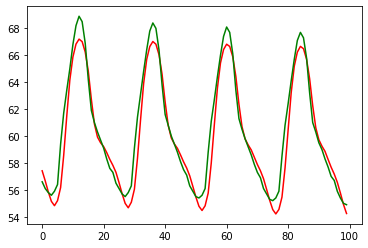

In [179]:
plot_predictions1(model0, X2_test, y2_test)

In [231]:
#add pressure and try to predict it at each time step
p_temp_df = pd.concat([df['HLY_DEWP_NORMAL'+location], temp_df], axis = 1)
p_temp_df.head()

,HLY_DEWP_NORMAL_SF,HLY_TEMP_NORMAL_SF,Day sin,Day cos,Year sin,Year cos
date,,,,,,
2019-01-01 00:00:00,43.2,48.8,-5.030095e-12,1.000000,0.002021,0.999998
2019-01-01 01:00:00,43.1,48.5,2.588190e-01,0.965926,0.002738,0.999996
2019-01-01 02:00:00,42.6,47.6,5.000000e-01,0.866025,0.003455,0.999994
2019-01-01 03:00:00,42.3,47.2,7.071068e-01,0.707107,0.004172,0.999991
2019-01-01 04:00:00,42.2,46.8,8.660254e-01,0.500000,0.004888,0.999988


In [232]:
def df_to_X_y3(df, window_size= 7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [ r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0],df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)
        

In [233]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((8753, 7, 6), (8753, 2))

In [234]:
train_percent = 0.6
validation_percent = 0.2
test_percent = 0.2
train_percent_split = int(train_percent * len(X))
validation_percent_split = int(validation_percent * len(X)) + train_percent_split
test_percent_split = int(test_percent * len(X))

X3_train, y3_train = X3[:train_percent_split], y3[:train_percent_split]
X3_val, y3_val = X3[train_percent_split:validation_percent_split], y3[train_percent_split:validation_percent_split]
X3_test, y3_test = X3[validation_percent_split:], y3[validation_percent_split:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((5253, 7, 6), (5253, 2), (1751, 7, 6), (1751, 2), (1749, 7, 6), (1749, 2))

In [235]:
p_training_mean3 = np.mean(X3_train[:,:,0])
p_training_std3 = np.std(X3_train[:,:,0])

temp_training_mean3 = np.mean(X3_train[:,:,1])
temp_training_std3 = np.std(X3_train[:,:,1])

In [236]:
def preprocess3(X):
    X[:,:,0] = (X[:,:,0] - p_training_mean3)/p_training_std3
    X[:,:,1] = (X[:,:,1] - temp_training_mean3)/temp_training_std3

def preprocess_output3(y):
    y[:,0] = (y[:,0] - p_training_mean3)/p_training_std3
    y[:,1] = (y[:,1] - temp_training_mean3)/temp_training_std3
    return y

In [237]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [238]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 0.37150345, -0.09799884],
       [ 0.37150345, -0.15205752],
       [ 0.3408379 , -0.18809664],
       ...,
       [-1.34576754, -1.10709418],
       [-1.37643309, -1.2332311 ],
       [-1.37643309, -1.30530934]])

In [239]:
model1 = Sequential()
model1.add(InputLayer((7,6))) #six time steps, 7 variables of input
model1.add(LSTM(64)) #how many windows do we want to slide across
model1.add(Dense(8, 'relu'))
model1.add(Dense(2, 'linear')) #linear value, pos or neg (for temp)
model1.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 64)                18176     
                                                                 
 dense_49 (Dense)            (None, 8)                 520       
                                                                 
 dense_50 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [240]:
cp1 = ModelCheckpoint(directory + 'model1/', save_best_only = True) #I want to only save the best model (lowest validation loss)
#learning rate = higher the value, faster model tries to decrease loss
#but we don't want to dec super fast bc it won't find local min/max
model1.compile(loss = MeanSquaredError(), optimizer =Adam(learning_rate = 0.00001), metrics = [RootMeanSquaredError()])


In [241]:
model1.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs = 15, callbacks = [cp1])

Epoch 1/15
151/165 [==========================>...] - ETA: 0s - loss: 0.8786 - root_mean_squared_error: 0.9373

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 9s 30ms/step - loss: 0.8753 - root_mean_squared_error: 0.9356 - val_loss: 2.2285 - val_root_mean_squared_error: 1.4928
Epoch 2/15
158/165 [===========================>..] - ETA: 0s - loss: 0.8056 - root_mean_squared_error: 0.8976

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.8015 - root_mean_squared_error: 0.8953 - val_loss: 2.1204 - val_root_mean_squared_error: 1.4562
Epoch 3/15
164/165 [============================>.] - ETA: 0s - loss: 0.7297 - root_mean_squared_error: 0.8542

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 11s 70ms/step - loss: 0.7294 - root_mean_squared_error: 0.8541 - val_loss: 2.0150 - val_root_mean_squared_error: 1.4195
Epoch 4/15
158/165 [===========================>..] - ETA: 0s - loss: 0.6592 - root_mean_squared_error: 0.8119

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 24ms/step - loss: 0.6584 - root_mean_squared_error: 0.8114 - val_loss: 1.9018 - val_root_mean_squared_error: 1.3791
Epoch 5/15
165/165 [==============================] - ETA: 0s - loss: 0.5886 - root_mean_squared_error: 0.7672

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.5886 - root_mean_squared_error: 0.7672 - val_loss: 1.7806 - val_root_mean_squared_error: 1.3344
Epoch 6/15
149/165 [==========================>...] - ETA: 0s - loss: 0.5216 - root_mean_squared_error: 0.7222

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 24ms/step - loss: 0.5207 - root_mean_squared_error: 0.7216 - val_loss: 1.6474 - val_root_mean_squared_error: 1.2835
Epoch 7/15
154/165 [===========================>..] - ETA: 0s - loss: 0.4568 - root_mean_squared_error: 0.6759

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 24ms/step - loss: 0.4548 - root_mean_squared_error: 0.6744 - val_loss: 1.5012 - val_root_mean_squared_error: 1.2252
Epoch 8/15
154/165 [===========================>..] - ETA: 0s - loss: 0.3934 - root_mean_squared_error: 0.6272

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 24ms/step - loss: 0.3926 - root_mean_squared_error: 0.6266 - val_loss: 1.3524 - val_root_mean_squared_error: 1.1629
Epoch 9/15
158/165 [===========================>..] - ETA: 0s - loss: 0.3367 - root_mean_squared_error: 0.5803

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.3353 - root_mean_squared_error: 0.5790 - val_loss: 1.2011 - val_root_mean_squared_error: 1.0960
Epoch 10/15
161/165 [============================>.] - ETA: 0s - loss: 0.2849 - root_mean_squared_error: 0.5337

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.2837 - root_mean_squared_error: 0.5326 - val_loss: 1.0514 - val_root_mean_squared_error: 1.0254
Epoch 11/15
149/165 [==========================>...] - ETA: 0s - loss: 0.2386 - root_mean_squared_error: 0.4885

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.2379 - root_mean_squared_error: 0.4878 - val_loss: 0.9087 - val_root_mean_squared_error: 0.9532
Epoch 12/15
157/165 [===========================>..] - ETA: 0s - loss: 0.1984 - root_mean_squared_error: 0.4454

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.1982 - root_mean_squared_error: 0.4452 - val_loss: 0.7719 - val_root_mean_squared_error: 0.8786
Epoch 13/15
156/165 [===========================>..] - ETA: 0s - loss: 0.1643 - root_mean_squared_error: 0.4054

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 20ms/step - loss: 0.1642 - root_mean_squared_error: 0.4052 - val_loss: 0.6477 - val_root_mean_squared_error: 0.8048
Epoch 14/15
158/165 [===========================>..] - ETA: 0s - loss: 0.1363 - root_mean_squared_error: 0.3692

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 3s 21ms/step - loss: 0.1361 - root_mean_squared_error: 0.3690 - val_loss: 0.5391 - val_root_mean_squared_error: 0.7343
Epoch 15/15
157/165 [===========================>..] - ETA: 0s - loss: 0.1140 - root_mean_squared_error: 0.3376

INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


INFO:tensorflow:Assets written to: /Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_ONEYEAR/model1/assets


165/165 [==============================] - 4s 22ms/step - loss: 0.1133 - root_mean_squared_error: 0.3365 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6692


In [242]:
def plot_predictions2(model,X,y,start = 0, end =100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:,0], predictions[:,1]
    p_actuals, temp_actuals = y[:,0], y[:,1]
    df = pd.DataFrame(data = { 'Temperature predictions': temp_preds,
                                'Temperature Actuals': temp_actuals,
                                'Pressure Predictions': p_preds,
                                'Pressure Actuals': p_actuals
        
                            })
    plt.plot(df['Temperature predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

,Temperature predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.044219,-0.097999,-0.078930,0.371503
1,0.030973,-0.152058,-0.037991,0.371503
2,0.023023,-0.188097,0.004415,0.340838
3,0.019966,-0.134038,0.041683,0.463500
4,0.021868,-0.043940,0.071323,0.586162
...,...,...,...,...
95,0.056420,-0.134038,-0.100440,0.310172
96,0.041719,-0.224136,-0.064127,0.248841
97,0.029212,-0.296214,-0.022509,0.248841
98,0.021863,-0.314234,0.020569,0.248841


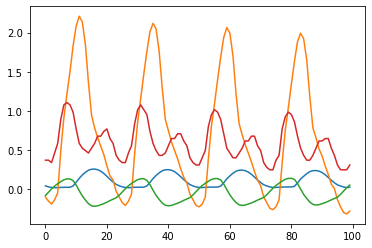

In [243]:
plot_predictions2(model5, X3_test, y3_test)